In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing

## Pre-Processing

### Metadata

In [2]:
metadata = pd.read_csv('SraRunTable.txt', sep='\t')

In [3]:
metadata.head()

,BioSample,DATASTORE_filetype,Experiment,MBases,MBytes,Organism,Run,SRA_Sample,Sample_Name,environment_biome,...,SRA_Study,colection_date,geographic_location_country_and_or_sea,human_associated_environmental_package,investigation_type,latitude,longitude,project_name,sequencing_method,sample_type
0,SAMEA4044115,sra unknown_contigs,ERX1537982,45,29,human oral metagenome,ERR1466857,ERS1215225,SAMEA4044115 ERS1215225,oral,...,ERP016180,20-Jan-13,Finland,human-associated,metagenome,65.009056,25.518028,Oral and nasal microbiome in PD,Illumina MiSeq,control
1,SAMEA4044116,sra unknown_contigs,ERX1537983,44,28,human oral metagenome,ERR1466858,ERS1215226,SAMEA4044116 ERS1215226,oral,...,ERP016180,20-Jan-13,Finland,human-associated,metagenome,65.009056,25.518028,Oral and nasal microbiome in PD,Illumina MiSeq,control
2,SAMEA4044117,sra unknown_contigs,ERX1537984,39,24,human oral metagenome,ERR1466859,ERS1215227,SAMEA4044117 ERS1215227,oral,...,ERP016180,20-Jan-13,Finland,human-associated,metagenome,65.009056,25.518028,Oral and nasal microbiome in PD,Illumina MiSeq,control
3,SAMEA4044118,sra unknown_contigs,ERX1537985,33,21,human oral metagenome,ERR1466860,ERS1215228,SAMEA4044118 ERS1215228,oral,...,ERP016180,20-Jan-13,Finland,human-associated,metagenome,65.009056,25.518028,Oral and nasal microbiome in PD,Illumina MiSeq,control
4,SAMEA4044119,sra unknown_contigs,ERX1537986,39,25,human oral metagenome,ERR1466861,ERS1215229,SAMEA4044119 ERS1215229,oral,...,ERP016180,20-Jan-13,Finland,human-associated,metagenome,65.009056,25.518028,Oral and nasal microbiome in PD,Illumina MiSeq,control


In [4]:
metadata.columns

Index(['BioSample', 'DATASTORE_filetype', 'Experiment', 'MBases', 'MBytes',
       'Organism', 'Run', 'SRA_Sample', 'Sample_Name', 'environment_biome',
       'environment_feature', 'environment_material', 'host_sex', 'Assay_Type',
       'AvgSpotLen', 'BioProject', 'Center_Name', 'Consent',
       'DATASTORE_provider', 'InsertSize', 'Instrument', 'LibraryLayout',
       'LibrarySelection', 'LibrarySource', 'Library_Name', 'LoadDate',
       'Platform', 'ReleaseDate', 'SRA_Study', 'colection_date',
       'geographic_location_country_and_or_sea',
       'human_associated_environmental_package', 'investigation_type',
       'latitude', 'longitude', 'project_name', 'sequencing_method',
       'sample_type'],
      dtype='object')

In [5]:
metadata.shape

(284, 38)

In [6]:
metadata['geographic_location_country_and_or_sea'].value_counts()

Finland    284
Name: geographic_location_country_and_or_sea, dtype: int64

In [7]:
metadata['environment_biome'].value_counts()

oral     148
nasal    136
Name: environment_biome, dtype: int64

In [8]:
metadata['host_sex'].value_counts()

female    143
male      141
Name: host_sex, dtype: int64

### OTU Table

In [9]:
otu_table = pd.read_csv('parkinsons_otu_table.tsv', sep='\t')

In [10]:
otu_table.head()

,TAGAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCATGCCTTACACATGCAAGTCGAACGGCAGCACGGGAGCAATCCTGGTGGCGAGTGGCGAACGGGTGAGTAATACATCGGAACGTGCCCTGTAGTGGGGGATAACTAGTCGAAAGACTAGCTAATACCGCATACGACCTGAGGGTGAAAGTGGGGGACCGCAAGGCCTCATGCTATAGGAGCGGCCGATGTCTGATTAGCTAGTTGGTGGGGTAAAGGCCTACCAAGGCGACGATCAGTAGCTGGTCTGAGAGGACGATCAGCCACACTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATTTTGGACAATGGGGGCAACCCTGATCCAGCAATGCCGCGTGTGTGAAGAAGGCCTTCGGGTTGTAAAGCACTTTTGTCCGGGAAGAAATCGCACCTGATAATACCGGGTGTGGATGACGGTACCGGAAGAATAAGGACCGGCTAACTACGTGCCAGCAGCCGCGGTAATACG,TAGAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCATGCCTTACACATGCAAGTCGAACGGCAGCACGGGAGCAATCCTGGTGGCGAGTGGCGAACGGGTGAGTAATACATCGGAACGTGCCCTGTAGTGGGGGATAACTAGTCGAAAGACTAGCTAATACCGCATACGACCTGAGGGTGAAAGTGGGGGACCGCAAGGCCTCATGCTATAGGAGCGGCCGATGTCTGATTAGCTAGTTGGTGGGGTAAAGGCCTACCAAGGCGACGATCAGTAGCTGGTCTGAGAGGACGATCAGCCACACTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATTTTGGACAATGGGGGCAACCCTGATCCAGCAATGCCGCGTGTGTGAAGAAGGCCTTCGGGTTGTAAAGCACTTTTGTCCGGGAAGAAATCGCACCTGATAATACCGGGTGTGGATGACGGTACCGGAAGAATAAGGACCGGCTAACTACGTGCCAGCAGCCGCGGTAATACTA,TAGAGAGTTTGATCCTGGCTCAGATTGAACGCTGGCGGCATGCCTTACACATGCAAGTCGAACGGCAGCACGGGAGCAATCCTGGTGGCGAGTGGCGAACGGGTGAGTAATACATCGGAACGTGCCCTGTAGTGGGGGATAACTAGTCGAAAGACTAGCTAATACCGCATACGACCTGAGGGTGAAAGTGGGGGACCGCAAGGCCTCATGCTATAGGAGCGGCCGATGTCTGATTAGCTAGTTGGTGGGGTAAAGGCCTACCAAGGCGACGATCAGTAGCTGGTCTGAGAGGACGATCAGCCACACTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATTTTGGACAATGGGGGCAACCCTGATCCAGCAATGCCGCGTGTGTGAAGAAGGCCTTCGGGTTGTAAAGCACTTTTGTCCGGGAAGAAATCGCACCTGATAATACCGGGTGTGGATGACGGTACCGGAAGAATAAGGACCGGCTAACTACGTGCCAGCAGCCGCGGTAATACG,TAGAGAGTTTGATCCTGGCTCAGATTGAACGCTGGCGGCATGCCTTACACATGCAAGTCGAACGGCAGCACGGGAGCAATCCTGGTGGCGAGTGGCGAACGGGTGAGTAATACATCGGAACGTGCCCTGTAGTGGGGGATAACTAGTCGAAAGACTAGCTAATACCGCATACGACCTGAGGGTGAAAGTGGGGGACCGCAAGGCCTCATGCTATAGGAGCGGCCGATGTCTGATTAGCTAGTTGGTGGGGTAAAGGCCTACCAAGGCGACGATCAGTAGCTGGTCTGAGAGGACGATCAGCCACACTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATTTTGGACAATGGGGGCAACCCTGATCCAGCAATGCCGCGTGTGTGAAGAAGGCCTTCGGGTTGTAAAGCACTTTTGTCCGGGAAGAAATCGCACCTGATAATACCGGGTGTGGATGACGGTACCGGAAGAATAAGGACCGGCTAACTACGTGCCAGCAGCCGCGGTAATACTA,TAGAGAGTTTGATCATGGCTCAGGACGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGGAAAGGCCTTTTCGGAGGTACTCGAGTGGCGAACGGGTGAGTAACACGTGGGTGATCTGCCCTGCACTCTGGGATAAGCCTGGGAAACTGGGTCTAATACCGGATAGGACCGCACTTTAGTGTGTGTGGTGGAAAGTTTTTTCGGTGTAGGATGAGCCCGCGGCCTATCAGCTTGTTGGTGGGGTAATGGCCTACCAAGGCGGCGACGGGTAGCCGGACTGAGAGGTTGGTCGGCCACATTGGGACTGAGATACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAGCGACGCCGCGTGGGGGATGACGGCCTTCGGGTTGTAAACTCCTTTCGCCAGGGACGAAGCGTTTTGTGACGGTACCTGGAGAAGAAGCACCGGCTAACTACGTGCCAGCAGCCGCGGTAATACTA,AGAGTTTGATCATGGCTCAGGACGAACGCTGGCGGCGTGCCTAATACATGCAAGTAGAACGCTGAAGGAGGAGCTTGCTTCTCTGGATGAGTTGCGAACGGGTGAGTAACGCGTAGGTAACCTGCCTGGTAGCGGGGGATAACTATTGGAAACGATAGCTAATACCGCATAATAGTAGATGTTGCATGACATTTGCTTAAAAGGTGCAATTGCATCACTACCAGATGGACCTGCGTTGTATTAGCTAGTTGGTGGGGTAACGGCTCACCAAGGCGACGATACATAGCCGACCTGAGAGGGTGATCGGCCACACTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTAGGGAATCTTCGGCAATGGACGGAAGTCTGACCGAGCAACGCCGCGTGAGTGAAGAAGGTTTTCGGATCGTAAAGCTCTGTTGTAAGAGAAGAACGAGTGTGAGAGTGGAAAGTTCACACTGTGACGGTATCTTACCAGAAAGGGACGGCTAACTACGTGCCAGCAGCCGCGGTAATACG,CTCTAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCATGCCTTACACATGCAAGTCGAACGGCAGCACGGGAGCAATCCTGGTGGCGAGTGGCGAACGGGTGAGTAATACATCGGAACGTGCCCTGTAGTGGGGGATAACTAGTCGAAAGACTAGCTAATACCGCATACGACCTGAGGGTGAAAGTGGGGGACCGCAAGGCCTCATGCTATAGGAGCGGCCGATGTCTGATTAGCTAGTTGGTGGGGTAAAGGCCTACCAAGGCGACGATCAGTAGCTGGTCTGAGAGGACGATCAGCCACACTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATTTTGGACAATGGGGGCAACCCTGATCCAGCAATGCCGCGTGTGTGAAGAAGGCCTTCGGGTTGTAAAGCACTTTTGTCCGGGAAGAAATCGCACCTGATAATACCGGGTGTGGATGACGGTACCGGAAGAATAAGGACCGGCTAACTACGTGCCAGCAGCCGCGGTAATACG,AGAGTTTGATCATGGCTCAGGACGAACGCTGGCGGCGTGCCTAATACATGCAAGTAGAACGCTGAAGGAGGAGCTTGCTTCTCCGGATGAGTTGCGAACGGGTGAGTAACGCGTAGGTAACCTGCCTGGTAGCGGGGGATAACTATTGGAAACGATAGCTAATACCGCATAAGAGTAGATGTTGCATGACATTTGCTTAAAAGGTGCAATTGCATCACTACCAGATGGACCTGCGTTGTATTAGCTAGTTGGTGGGGTAACGGCTCACCAAGGCGACGATACATAGCCGACCTGAGAGGGTGATCGGCCACA

In [11]:
otu_table.shape

(284, 16576)

### Taxonomy Table

In [12]:
tax_table = pd.read_csv('parkinsons_tax_table.tsv', sep='\t')

In [13]:
tax_table.head()

,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Ralstonia,NaN
1,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Ralstonia,NaN
2,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Ralstonia,NaN
3,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Ralstonia,NaN
4,Bacteria,Actinobacteria,Actinobacteria,Corynebacteriales,Corynebacteriaceae,Corynebacterium_1,NaN


In [14]:
tax_table.shape

(16576, 7)

In [15]:
tax_table['otu_index'] = range(1, 16577)
tax_table.fillna('N/A', inplace=True)
tax_table.head()

,Kingdom,Phylum,Class,Order,Family,Genus,Species,otu_index
0,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Ralstonia,NaN,1
1,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Ralstonia,NaN,2
2,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Ralstonia,NaN,3
3,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Ralstonia,NaN,4
4,Bacteria,Actinobacteria,Actinobacteria,Corynebacteriales,Corynebacteriaceae,Corynebacterium_1,NaN,5


In [77]:
for col in tax_table.columns:
    print(col, len(tax_table[col].value_counts()))

Kingdom 2
Phylum 26
Class 50
Order 105
Family 175
Genus 438
Species 93
otu_index 16576


In [127]:
encoders = {}

for col in tax_table.columns[:-1]:

    #Label encoder
    le = preprocessing.LabelEncoder()
    le.fit(tax_table[col].value_counts().index)
#     labels = le.transform(tax_table[col].value_counts().index)

    encoders[col] = le

#le.inverse_transform(0)

combined_labels = []

for i, row in tax_table.iterrows():
    
    cur_encoding = ''
    
    for col in tax_table.columns[:-1]:

        cur_col_encoding = str(encoders[col].transform([row[col]])[0])
        cur_encoding += cur_col_encoding
    
    combined_labels.append(cur_encoding)

In [128]:
tax_table['combined_code'] = combined_labels

In [129]:
# np.unique(combined_labels, return_counts=True)

In [131]:
tax_table.head(10)

,Kingdom,Phylum,Class,Order,Family,Genus,Species,otu_index,combined_code
0,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Ralstonia,N/A,1,0202216243390
1,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Ralstonia,N/A,2,0202216243390
2,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Ralstonia,N/A,3,0202216243390
3,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Ralstonia,N/A,4,0202216243390
4,Bacteria,Actinobacteria,Actinobacteria,Corynebacteriales,Corynebacteriaceae,Corynebacterium_1,N/A,5,01226361050
5,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,N/A,6,0138521534020
6,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Ralstonia,N/A,7,0202216243390
7,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,N/A,8,0138521534020
8,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,N/A,9,0138521534020
9,Bacteria,Actinobacteria,Actinobacteria,Corynebacteriales,Corynebacteriaceae,Corynebacterium_1,N/A,10,01226361050


### Combined

In [16]:
otu_table.columns = tax_table['otu_index']

In [17]:
otu_table['group'] = metadata['sample_type']

In [18]:
otu_table['sex'] = metadata['host_sex']

In [19]:
otu_table['oral_nasal'] = metadata['environment_biome']

In [20]:
otu_table.head()

otu_index,1,2,3,4,5,6,7,8,9,10,...,16570,16571,16572,16573,16574,16575,16576,group,sex,oral_nasal
0,0,0,0,0,0,0,0,2379,0,0,...,0,0,0,0,0,0,0,control,male,oral
1,0,0,0,0,0,727,0,0,193,0,...,0,0,0,0,0,0,0,control,female,oral
2,10,0,0,0,0,4910,0,1947,0,0,...,0,0,0,0,0,0,0,control,male,oral
3,0,0,0,0,0,0,0,484,218,0,...,0,0,0,0,0,0,0,control,female,oral
4,0,0,0,0,0,0,0,0,403,0,...,0,0,0,0,0,0,0,control,male,oral


## Data Exploration

#### Check to see sample distribution

In [21]:
male_df = otu_table[otu_table['sex'] == 'male']
female_df = otu_table[otu_table['sex'] == 'female']

In [22]:
male_df['group'].value_counts()

control    71
PD         70
Name: group, dtype: int64

In [23]:
female_df['group'].value_counts()

control    72
PD         71
Name: group, dtype: int64

In [24]:
male_df['oral_nasal'].value_counts()

oral     73
nasal    68
Name: oral_nasal, dtype: int64

In [25]:
female_df['oral_nasal'].value_counts()

oral     75
nasal    68
Name: oral_nasal, dtype: int64

All the groups seem to have the same number of samples which is good! 

#### Oral vs. Nasal

In [26]:
oral_df = otu_table[otu_table['oral_nasal'] == 'oral']
nasal_df = otu_table[otu_table['oral_nasal'] == 'nasal']

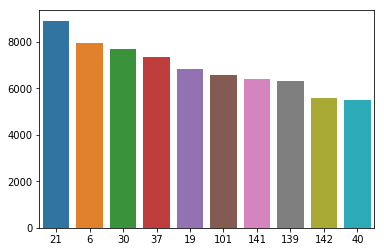

In [27]:
top_10_oral = oral_df.max(axis=1).sort_values(ascending=False)[0:10]
sns.barplot(x=top_10_oral.index, y=top_10_oral, order = top_10_oral.index)

In [28]:
for bacteria in top_10_oral.index:
    print('Phylum: ', tax_table.iloc[bacteria]['Phylum'])
    print('Genus: ', tax_table.iloc[bacteria]['Genus'])
    print('-----')

Phylum:  Firmicutes
Genus:  Streptococcus
-----
Phylum:  Proteobacteria
Genus:  Ralstonia
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
-----
Phylum:  Proteobacteria
Genus:  Ralstonia
-----
Phylum:  Firmicutes
Genus:  Streptococcus
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
-----
Phylum:  Actinobacteria
Genus:  Rothia
-----
Phylum:  Firmicutes
Genus:  Streptococcus
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
-----
Phylum:  Proteobacteria
Genus:  Moraxella
-----


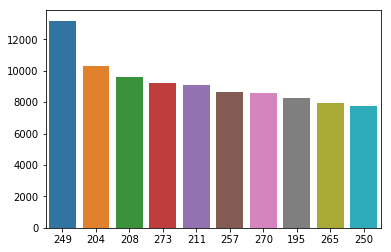

In [29]:
top_10_nasal = nasal_df.max(axis=1).sort_values(ascending=False)[0:10]
sns.barplot(x=top_10_nasal.index, y=top_10_nasal, order = top_10_nasal.index)

In [30]:
for bacteria in top_10_nasal.index:
    print('Phylum: ', tax_table.iloc[bacteria]['Phylum'])
    print('Genus: ', tax_table.iloc[bacteria]['Genus'])
    print('-----')

Phylum:  Proteobacteria
Genus:  Neisseria
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
-----
Phylum:  Firmicutes
Genus:  Streptococcus
-----
Phylum:  Proteobacteria
Genus:  Ralstonia
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
-----
Phylum:  Proteobacteria
Genus:  Neisseria
-----
Phylum:  Firmicutes
Genus:  Streptococcus
-----
Phylum:  Firmicutes
Genus:  Streptococcus
-----
Phylum:  Fusobacteria
Genus:  Leptotrichia
-----
Phylum:  Firmicutes
Genus:  Streptococcus
-----


In [31]:
set(top_10_nasal.index).intersection(set(top_10_oral))

set()

Top 10 bacteria are different from oral to nasal

#### Control vs. PD

In [32]:
control_df = otu_table[otu_table['group'] == 'control']
pd_df = otu_table[otu_table['group'] == 'PD']

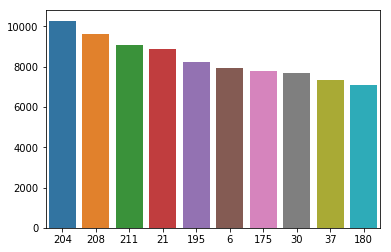

In [33]:
top_10_control = control_df.max(axis=1).sort_values(ascending=False)[0:10]
sns.barplot(x=top_10_control.index, y=top_10_control, order = top_10_control.index)

In [34]:
for bacteria in top_10_control.index:
    print('Phylum: ', tax_table.iloc[bacteria]['Phylum'])
    print('Genus: ', tax_table.iloc[bacteria]['Genus'])
    print('-----')

Phylum:  Actinobacteria
Genus:  Corynebacterium_1
-----
Phylum:  Firmicutes
Genus:  Streptococcus
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
-----
Phylum:  Firmicutes
Genus:  Streptococcus
-----
Phylum:  Firmicutes
Genus:  Streptococcus
-----
Phylum:  Proteobacteria
Genus:  Ralstonia
-----
Phylum:  Proteobacteria
Genus:  Moraxella
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
-----
Phylum:  Proteobacteria
Genus:  Ralstonia
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
-----


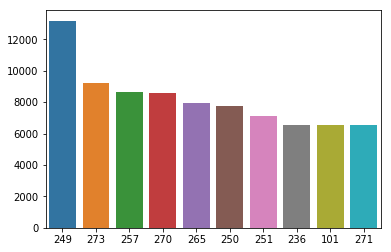

In [35]:
top_10_pd = pd_df.max(axis=1).sort_values(ascending=False)[0:10]
sns.barplot(x=top_10_pd.index, y=top_10_pd, order = top_10_pd.index)

In [36]:
for bacteria in top_10_pd.index:
    print('Phylum: ', tax_table.iloc[bacteria]['Phylum'])
    print('Genus: ', tax_table.iloc[bacteria]['Genus'])
    print('-----')

Phylum:  Proteobacteria
Genus:  Neisseria
-----
Phylum:  Proteobacteria
Genus:  Ralstonia
-----
Phylum:  Proteobacteria
Genus:  Neisseria
-----
Phylum:  Firmicutes
Genus:  Streptococcus
-----
Phylum:  Fusobacteria
Genus:  Leptotrichia
-----
Phylum:  Firmicutes
Genus:  Streptococcus
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
-----
Phylum:  Firmicutes
Genus:  Streptococcus
-----


In [37]:
set(top_10_control.index).intersection(set(top_10_pd))

set()

Hmmm...top 10 control is different than pd as well...suspicious or interesting?

## ML

In [38]:
#Imports
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD

In [39]:
otu_table['group'].value_counts()

control    143
PD         141
Name: group, dtype: int64

In [40]:
#Label encoder
le = preprocessing.LabelEncoder()
le.fit(otu_table['group'])
labels = le.transform(otu_table['group'])

In [41]:
#Preprocess
X = np.array(otu_table)[:,:-3]

#Scale
X_standard = StandardScaler().fit_transform(X)

svd = TruncatedSVD(n_components=100)
components = svd.fit_transform(X)
# svd.components_.shape
# X.shape

C:\Users\danil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\danil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [42]:
#Control vs. PD prediction with svd

models = [LogisticRegression(penalty='l1'), LinearSVC(), RandomForestClassifier()]
model_names = ['LR', 'Linear SVM', 'RF']
# lm = LogisticRegression(penalty='l1')
# lm.fit(X, labels)

print('Cross validation for each model starting...')
for i in range(len(models)):
    print(model_names[i])
    
    cross_val = (cross_val_score(models[i], components, labels, cv=10))
    
    print('Cross Val Scores: ', cross_val)
    print('Average Score: ', cross_val.mean())
    print('---')

Cross validation for each model starting...
LR
Cross Val Scores:  [ 0.63333333  0.4137931   0.68965517  0.35714286  0.53571429  0.35714286
  0.5         0.64285714  0.42857143  0.5       ]
Average Score:  0.505821018062
---
Linear SVM
Cross Val Scores:  [ 0.53333333  0.51724138  0.68965517  0.46428571  0.5         0.5
  0.46428571  0.75        0.57142857  0.42857143]
Average Score:  0.541880131363
---
RF
Cross Val Scores:  [ 0.56666667  0.48275862  0.51724138  0.67857143  0.71428571  0.5
  0.46428571  0.5         0.46428571  0.42857143]
Average Score:  0.531666666667
---


In [43]:
#Control vs. PD prediction with scaling

models = [LogisticRegression(penalty='l1'), LinearSVC(), RandomForestClassifier()]
model_names = ['LR', 'Linear SVM', 'RF']
# lm = LogisticRegression(penalty='l1')
# lm.fit(X, labels)

print('Cross validation for each model starting...')
for i in range(len(models)):
    print(model_names[i])
    
    cross_val = (cross_val_score(models[i], X_standard, labels, cv=10))
    
    print('Cross Val Scores: ', cross_val)
    print('Average Score: ', cross_val.mean())
    print('---')

Cross validation for each model starting...
LR
Cross Val Scores:  [ 0.6         0.44827586  0.55172414  0.5         0.60714286  0.57142857
  0.53571429  0.53571429  0.35714286  0.42857143]
Average Score:  0.513571428571
---
Linear SVM
Cross Val Scores:  [ 0.56666667  0.62068966  0.65517241  0.5         0.57142857  0.42857143
  0.5         0.60714286  0.35714286  0.57142857]
Average Score:  0.537824302135
---
RF
Cross Val Scores:  [ 0.66666667  0.4137931   0.44827586  0.75        0.67857143  0.46428571
  0.42857143  0.60714286  0.60714286  0.53571429]
Average Score:  0.560016420361
---


In [44]:
#Control vs. PD prediction

models = [LogisticRegression(penalty='l1'), LinearSVC(), RandomForestClassifier()]
model_names = ['LR', 'Linear SVM', 'RF']
# lm = LogisticRegression(penalty='l1')
# lm.fit(X, labels)

print('Cross validation for each model starting...')
for i in range(len(models)):
    print(model_names[i])
    
    cross_val = (cross_val_score(models[i], X, labels, cv=10))
    
    print('Cross Val Scores: ', cross_val)
    print('Average Score: ', cross_val.mean())
    print('---')

Cross validation for each model starting...
LR
Cross Val Scores:  [ 0.6         0.44827586  0.55172414  0.46428571  0.53571429  0.46428571
  0.53571429  0.42857143  0.57142857  0.35714286]
Average Score:  0.495714285714
---
Linear SVM
Cross Val Scores:  [ 0.63333333  0.51724138  0.5862069   0.53571429  0.60714286  0.39285714
  0.57142857  0.39285714  0.5         0.5       ]
Average Score:  0.52367816092
---
RF
Cross Val Scores:  [ 0.5         0.4137931   0.48275862  0.57142857  0.60714286  0.53571429
  0.28571429  0.42857143  0.39285714  0.53571429]
Average Score:  0.475369458128
---


In [45]:
#Sex prediction

#Label encoder
le = preprocessing.LabelEncoder()
le.fit(otu_table['sex'])
labels = le.transform(otu_table['sex'])

#Preprocess
X = np.array(otu_table)[:,:-3]

models = [LogisticRegression(penalty='l1'), LinearSVC(), RandomForestClassifier()]
model_names = ['LR', 'Linear SVM', 'RF']
# lm = LogisticRegression(penalty='l1')
# lm.fit(X, labels)

print('Cross validation for each model starting...')
for i in range(len(models)):
    print(model_names[i])
    
    cross_val = (cross_val_score(models[i], X, labels, cv=10))
    
    print('Cross Val Scores: ', cross_val)
    print('Average Score: ', cross_val.mean())
    print('---')

Cross validation for each model starting...
LR
Cross Val Scores:  [ 0.6         0.51724138  0.4137931   0.57142857  0.67857143  0.53571429
  0.75        0.64285714  0.57142857  0.46428571]
Average Score:  0.574532019704
---
Linear SVM
Cross Val Scores:  [ 0.63333333  0.55172414  0.44827586  0.57142857  0.64285714  0.57142857
  0.67857143  0.60714286  0.5         0.46428571]
Average Score:  0.566904761905
---
RF
Cross Val Scores:  [ 0.4         0.48275862  0.51724138  0.53571429  0.46428571  0.67857143
  0.57142857  0.57142857  0.64285714  0.46428571]
Average Score:  0.532857142857
---


In [46]:
#Oral vs. nasal prediction

#Label encoder
le = preprocessing.LabelEncoder()
le.fit(otu_table['oral_nasal'])
labels = le.transform(otu_table['oral_nasal'])

#Preprocess
X = np.array(otu_table)[:,:-3]

models = [LogisticRegression(penalty='l1'), LinearSVC(), RandomForestClassifier()]
model_names = ['LR', 'Linear SVM', 'RF']
# lm = LogisticRegression(penalty='l1')
# lm.fit(X, labels)

print('Cross validation for each model starting...')
for i in range(len(models)):
    print(model_names[i])
    
    cross_val = (cross_val_score(models[i], X, labels, cv=10))
    
    print('Cross Val Scores: ', cross_val)
    print('Average Score: ', cross_val.mean())
    print('---')

Cross validation for each model starting...
LR
Cross Val Scores:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Average Score:  1.0
---
Linear SVM
Cross Val Scores:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Average Score:  1.0
---
RF
Cross Val Scores:  [ 1.          1.          1.          1.          0.96551724  1.          1.
  1.          1.          1.        ]
Average Score:  0.996551724138
---
